# App Rating Prediction








In [61]:

import pandas as pd 
import numpy as np                                                 
import matplotlib.pyplot as plt                                    
from matplotlib.pylab import rcParams                                                                           
import seaborn as sns  
from scipy import stats
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clrity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
                                       
#set seaborn plotting aesthetics
sns.set(style='whitegrid')
%matplotlib inline

#suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [62]:
df=pd.read_csv("train.csv")
df.head()


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.90000
1,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.70000
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.30000
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.40000
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.80000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      8968 non-null   object 
 1   X1      8968 non-null   object 
 2   X2      8968 non-null   object 
 3   X3      8968 non-null   object 
 4   X4      8968 non-null   object 
 5   X5      8967 non-null   object 
 6   X6      8968 non-null   object 
 7   X7      8967 non-null   object 
 8   X8      8968 non-null   object 
 9   X9      8968 non-null   object 
 10  X10     8961 non-null   object 
 11  X11     8965 non-null   object 
 12  Y       7494 non-null   float64
dtypes: float64(1), object(12)
memory usage: 910.9+ KB


In [64]:
df.isnull().sum()

X0        0
X1        0
X2        0
X3        0
X4        0
X5        1
X6        0
X7        1
X8        0
X9        0
X10       7
X11       3
Y      1474
dtype: int64

In [65]:
for col in df.columns:
    print(col,df[col].unique(),"\n")


X0 ['Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps'
 'Pixel Draw - Number Art Coloring Book' ...
 'Fr. Mike Schmitz Audio Teachings' 'Parkinson Exercices FR'
 'iHoroscope - 2018 Daily Horoscope & Astrology'] 

X1 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'] 

X2 ['967' '87510' '167' ... '88486' '603' '398307'] 

X3 ['14M' '8.7M' '2.8M' '5.6M' '19M' '29M' '3.1M' '28M' '12M' '21M' '2.7M'
 '5.5M' '39M' '4.2M' '7.0M' '6.0M' '25M' '6.1M' '4.6M' '9.2M' '11M' '24M'
 'Varies with device' '9.4M' '10M' '1.2M' '26M' '56M' '35M' '33M' '54M'
 '201k' '5

In [66]:
df = df.rename(columns={
    "X0": "App_Name",
    "X1": "Category",
    "X2": "Reviews",
    "X3": "Size",
    "X4": "Installs",
    "X5": "Free_Paid",
    "X6": "Price",
    "X7": "Content_Rating",
    "X8": "Sub_Category",
    "X9": "Last_Updated",
    "X10": "Current_Version",
    "X11": "Android_Version",
    "Y": "Rating"
})


In [67]:
df.head()

,App_Name,Category,Reviews,Size,Installs,Free_Paid,Price,Content_Rating,Sub_Category,Last_Updated,Current_Version,Android_Version,Rating
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.90000
1,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.70000
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.30000
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.40000
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.80000


In [68]:
df.App_Name.describe()

count       8968
unique      8160
top       ROBLOX
freq           8
Name: App_Name, dtype: object

- ROBLOX has maximum representation. Let's check it.


In [69]:
df[df.App_Name == 'ROBLOX']

,App_Name,Category,Reviews,Size,Installs,Free_Paid,Price,Content_Rating,Sub_Category,Last_Updated,Current_Version,Android_Version,Rating
1334,ROBLOX,GAME,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000
1370,ROBLOX,GAME,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000
1409,ROBLOX,GAME,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000
1480,ROBLOX,GAME,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000
1502,ROBLOX,GAME,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000
1627,ROBLOX,FAMILY,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000
1780,ROBLOX,FAMILY,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000
3663,ROBLOX,FAMILY,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4.50000


Everything except 'Reviews' and 'Category' is same for all duplicate samples of ROBLOX. We seem to have data from different times. Maybe at some time, they decided to change the category of the app. 
I would choose number of reviews to be a defining criteria, keep that record for the app. The latest update should have bigger number of reviews (though it's mysterious how the rating can be same across). But let's not cogitate more. And drop rest of the samples for the set of records for an App, except for the one with maximum reviews- the latest one.

In [70]:
df = df.drop_duplicates(subset=['App_Name'], keep='first')


- Now, let's drop the feature 'App' altogether.

In [71]:
df.drop(columns = ['App_Name'], inplace=True)


In [72]:
df[['Android_Version','Current_Version']].head()

,Android_Version,Current_Version
0,4.0.3 and up,2.0.0
1,4.0.3 and up,1.2.4
2,4.4 and up,1.1
3,2.3 and up,1.0
4,4.0.3 and up,1.1


The versions of the app and of the Android on the phone have some role to play in deciding the rating of the app. Some versions of the app turn out to be so great that users rate the app highly and some versions disappoint the users, but there is no general trend. And there is no quantatitive way via which we can rank the versions across all the apps. I mean, it would be counterintuitive to convert an AndroidVer value of say '4.2 and up' into 4.2 and claim that 4.4 is better than this. In the same way, we cannot compare CurrentVer values such as 1.3 and 1.0.6. For these reasons, I will drop them.

In [73]:
df = df.drop(columns = ['Android_Version','Current_Version'])


In [74]:
df[['Free_Paid','Price']].sample(15)

,Free_Paid,Price
1432,Free,0
1468,Free,0
2839,Free,0
19,Free,0
4710,Free,0
3039,Free,0
4925,Free,0
7922,Free,0
4273,Free,0
2619,Free,0


- From the very definition of the two features, it is clear that if the 'Type' of the App is free, its 'Price' would be zero. Thus the information stored in feature 'App' is already there in the feature 'Price'. So, I will drop the 'Type' feature and process the 'Price' one.

In [75]:
df.drop(columns= ['Free_Paid'], inplace=True)


In [76]:

df[df['Price']=="Everyone"] 


,Category,Reviews,Size,Installs,Price,Content_Rating,Sub_Category,Last_Updated,Rating
8653,1.9,3.0M,"1,000+",Free,Everyone,NaN,"February 11, 2018",1.0.19,19.00000


- we have to  replace Everyone to zero

In [77]:
df.loc[df['Price'] == "Everyone", 'Price'] = '0'


In [78]:
# stripping $ off values under Price feature
df['Price'] = df['Price'].apply(lambda x: x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'])



In [79]:
df.Rating.describe()

count   6697.00000
mean       4.17232
std        0.56688
min        1.00000
25%        4.00000
50%        4.30000
75%        4.50000
max       19.00000
Name: Rating, dtype: float64

- the max of rating isnt 5, let's check that

In [80]:
df[df["Rating"]>5.0]

,Category,Reviews,Size,Installs,Price,Content_Rating,Sub_Category,Last_Updated,Rating
8653,1.9,3.0M,"1,000+",Free,0.00000,NaN,"February 11, 2018",1.0.19,19.00000


In [81]:
df.drop(df[df['Rating'] == 19].index, inplace=True)


In [82]:
df.Rating.describe()

count   6696.00000
mean       4.17010
std        0.53718
min        1.00000
25%        4.00000
50%        4.30000
75%        4.50000
max        5.00000
Name: Rating, dtype: float64

- now it is okay

In [83]:
def num_uni_anal(data, feature):
    print(f'Skewness of {feature} is:', round(data[feature].skew(),3))
    sns.displot(x=data[feature], kde=True)
    plt.title(f'Distribution plot of {feature}')
    plt.axvline(data[feature].mean(), color='red')
    plt.axvline(data[feature].median(), color='green')
    plt.show()
    
    print('-----------------------------')
    print('Five point summary is: \n',data[feature].describe())


Skewness of Rating is: -1.787


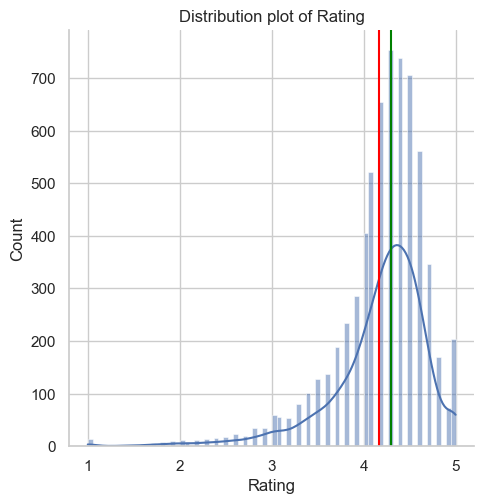

-----------------------------
Five point summary is: 
 count   6696.00000
mean       4.17010
std        0.53718
min        1.00000
25%        4.00000
50%        4.30000
75%        4.50000
max        5.00000
Name: Rating, dtype: float64


In [84]:
num_uni_anal(df, 'Rating')



The ratings are highly left skewed and most of the values are around 4.4. Generally, on Goole Store, we do find such trend. People give the rating highly if the product is free and it serves the purpose. Low ratings are given to particular products only- that are very bad. Let's check the number of downloads of those records which don't have 'Rating' values. I would be careful about giving someone a very high rating with very large userbase, because that is a rare case. Often with an increase in the userbase, we find a decrease in the rating.

In [85]:
# 10 samples from the records for which we do not have any ratings

df[df['Rating'].isna()].sample(10)

,Category,Reviews,Size,Installs,Price,Content_Rating,Sub_Category,Last_Updated,Rating
6064,BUSINESS,0,6.0M,50+,0.00000,Everyone,Business,"May 28, 2018",NaN
6437,FAMILY,7,28M,10+,0.99000,Everyone,Casual,"May 21, 2018",NaN
7401,NEWS_AND_MAGAZINES,1,6.3M,10+,0.00000,Everyone,News & Magazines,"July 2, 2018",NaN
836,EVENTS,3,11M,100+,0.00000,Everyone,Events,"July 4, 2018",NaN
7101,NEWS_AND_MAGAZINES,0,2.1M,0+,0.00000,Everyone,News & Magazines,"July 7, 2018",NaN
5895,BUSINESS,0,14M,5+,0.00000,Mature 17+,Business,"May 28, 2018",NaN
6880,BUSINESS,0,2.9M,5+,0.00000,Everyone,Business,"June 11, 2018",NaN
8716,SPORTS,0,26M,5+,0.00000,Everyone,Sports,"February 19, 2018",NaN
8000,TOOLS,0,21M,100+,0.00000,Everyone,Tools,"June 26, 2018",NaN
8943,BUSINESS,20,2.7M,"10,000+",0.00000,Everyone,Business,"July 17, 2018",NaN


It appears that most of samples that have missing Rating have a very low number of installs. That is expected. Google does not allow 'Rating' to appear in the case of new apps with very low userbase. Also, whenever an uploader uploads their app, they make sure it has ratings on the higher side by asking their friends and family. So even if they have a very high value, they do not correspond to usual user behavior. So manybe dropping the samples with no Rating would be a good idea.In addition, Rating is out predictive feature. We cannot feed in missing values of this feature with artificial data just like that. We have to drop all the samples with null Rating values.

In [86]:
df = df.dropna(subset=['Rating']) 
 

In [87]:
def missing_data(df):
    missing_data = pd.DataFrame({'net_missing': df.isnull().sum(), '%missing': (df.isnull().sum()/len(df))*100})
    print(missing_data)

missing_data(df)
df = df.drop(columns=['Sub_Category'])




                net_missing  %missing
Category                  0   0.00000
Reviews                   0   0.00000
Size                      0   0.00000
Installs                  0   0.00000
Price                     0   0.00000
Content_Rating            0   0.00000
Sub_Category              0   0.00000
Last_Updated              0   0.00000
Rating                    0   0.00000


- And thus, we don't have missing values in the dataset anymore. We are done with the missing values.

## EDA and Feature Engineering
- We are gonna analyze each feature one by one and take any actions if needed. 

### Installs

In [88]:
df.value_counts('Installs')

Installs
1,000,000+        1156
100,000+           869
10,000+            816
10,000,000+        783
1,000+             545
5,000,000+         508
500,000+           423
50,000+            368
5,000+             340
100+               242
50,000,000+        175
100,000,000+       171
500+               153
10+                 52
50+                 46
500,000,000+        21
1,000,000,000+      20
5+                   5
1+                   3
Name: count, dtype: int64

In [89]:
df['Installs'] = df['Installs'].str.extract("([0-9]+)", expand=True).apply(pd.to_numeric)




### Catagory

In [90]:
df['Category'].value_counts()

Category
FAMILY                 1284
GAME                    747
TOOLS                   589
MEDICAL                 246
PERSONALIZATION         243
FINANCE                 240
LIFESTYLE               239
PRODUCTIVITY            236
PHOTOGRAPHY             227
COMMUNICATION           226
BUSINESS                217
SPORTS                  212
HEALTH_AND_FITNESS      208
NEWS_AND_MAGAZINES      177
SOCIAL                  174
SHOPPING                151
TRAVEL_AND_LOCAL        147
BOOKS_AND_REFERENCE     130
VIDEO_PLAYERS           123
DATING                  114
MAPS_AND_NAVIGATION     101
EDUCATION                96
ENTERTAINMENT            93
FOOD_AND_DRINK           73
AUTO_AND_VEHICLES        59
WEATHER                  58
HOUSE_AND_HOME           51
LIBRARIES_AND_DEMO       49
ART_AND_DESIGN           45
COMICS                   39
EVENTS                   37
PARENTING                34
BEAUTY                   31
Name: count, dtype: int64

- I am going to LabelEncode data and I will not use Parametric algorithms which tend to rate a data as high or low based on its mathematical value.

### Review

In [91]:
df.Reviews.describe()

count     6696
unique    4518
top          3
freq        62
Name: Reviews, dtype: object

In [92]:
df.Reviews = [int(x) for x in df.Reviews]


### Size

In [93]:
df['Size'].describe()

count                   6696
unique                   369
top       Varies with device
freq                     988
Name: Size, dtype: object

In [94]:
df.Size.head(20)

0      14M
1     8.7M
2     2.8M
3     5.6M
4      19M
5      29M
6     3.1M
7      28M
8      12M
9      21M
10    2.7M
11    5.5M
12     39M
13     14M
14     12M
15    4.2M
17    6.0M
18     25M
19    6.1M
20    4.6M
Name: Size, dtype: object

A huge number of entries have the value = 'Varies with device'. Rest of the values have either M (MegaByte) or k(KiloByte) in front of a numeric. Let's deal with them one by one. I will convert everything into kilobytes. (kb) We know that 1 MegaByte = 1000 KiloByte So, I will multiply those values we have M in front with 1000.

  - Since we have no information, we will impute these values with the average of the rest of the values. 
  - That way these devices won't  affect our prediction.

In [95]:
def convertSize(df):
    # Replace 'Varies with device' with NaN
    df['Size'] = df['Size'].replace('Varies with device', np.nan)
    
    # Replace 'M' with 'e6' and 'K' with 'e3' for conversion to float
    df['Size'] = df['Size'].str.replace('M', 'e6', regex=False)
    df['Size'] = df['Size'].str.replace('K', 'e3', regex=False)
    
    # Convert to numeric values, coercing errors to NaN
    df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
    
    # Fill NaN values with the mean of the column
    df['Size'] = df['Size'].fillna(df['Size'].mean())

# Apply to both train and test dataframes
convertSize(df)



Skewness of Size is: 1.629


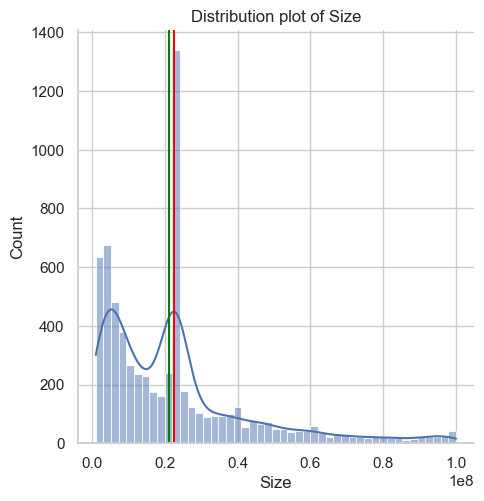

-----------------------------
Five point summary is: 
 count        6696.00000
mean     22630292.56769
std      20573819.51230
min       1000000.00000
25%       6800000.00000
50%      21000000.00000
75%      27000000.00000
max     100000000.00000
Name: Size, dtype: float64


In [96]:
num_uni_anal(df, 'Size')

In [97]:
import time
import datetime

df['Last_Updated'] = pd.to_datetime(df['Last_Updated'])
last_day = df['Last_Updated'].max()



In [98]:
# Recency = number of days between the end date and the current date

df['Recency'] = [((last_day - x).days) for x in df['Last_Updated']]


In [99]:
df.drop(columns=['Last_Updated'], inplace = True)


## Data preparation

In [100]:
df.head()

,Category,Reviews,Size,Installs,Price,Content_Rating,Rating,Recency
0,ART_AND_DESIGN,967,14000000.00000,500,0.00000,Everyone,3.90000,205
1,ART_AND_DESIGN,87510,8700000.00000,5,0.00000,Everyone,4.70000,7
2,ART_AND_DESIGN,967,2800000.00000,100,0.00000,Everyone,4.30000,49
3,ART_AND_DESIGN,167,5600000.00000,50,0.00000,Everyone,4.40000,500
4,ART_AND_DESIGN,178,19000000.00000,50,0.00000,Everyone,3.80000,104


In [101]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
cat_feat = ['Category', 'Content_Rating']
def label_encode(data,ToBeLabelEncoded):
    le = LabelEncoder()
    for feature in ToBeLabelEncoded:
        data[feature] = le.fit_transform(data[feature])
label_encode(df,cat_feat)    


In [102]:
df.head()

,Category,Reviews,Size,Installs,Price,Content_Rating,Rating,Recency
0,0,967,14000000.00000,500,0.00000,1,3.90000,205
1,0,87510,8700000.00000,5,0.00000,1,4.70000,7
2,0,967,2800000.00000,100,0.00000,1,4.30000,49
3,0,167,5600000.00000,50,0.00000,1,4.40000,500
4,0,178,19000000.00000,50,0.00000,1,3.80000,104


In [103]:
scaler = MinMaxScaler(feature_range=(0,1))
columns = df.columns
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.columns = columns



In [104]:
for col in df.columns:
    print(col,df[col].unique(),"\n")

Category [0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.375   0.40625 0.46875 0.5     0.53125 0.5625  0.4375
 0.34375 0.625   0.84375 0.8125  0.75    0.875   0.9375  0.90625 0.71875
 0.78125 0.6875  1.      0.96875 0.65625 0.59375] 

Reviews [1.23595311e-05 1.11963789e-03 2.12389458e-06 ... 1.13212537e-03
 7.70231647e-06 5.09614429e-03] 

Size [0.13131313 0.07777778 0.01818182 0.04646465 0.18181818 0.28282828
 0.02121212 0.27272727 0.11111111 0.2020202  0.01717172 0.04545455
 0.38383838 0.03232323 0.05050505 0.24242424 0.05151515 0.03636364
 0.08282828 0.1010101  0.23232323 0.2184878  0.08484848 0.09090909
 0.0020202  0.25252525 0.55555556 0.34343434 0.32323232 0.53535354
 0.04747475 0.16161616 0.07676768 0.01414141 0.26262626 0.06060606
 0.15151515 0.02424242 0.07979798 0.01919192 0.37373737 0.31313131
 0.04444444 0.17171717 0.0010101  0.06969697 0.51515152 0.08080808
 0.05757576 0.01616162 0.56565657 0.21212121 0.05454545 0.02222222
 0.072727

             Size    Price  Installs  Reviews   Rating
Size      1.00000 -0.01581  -0.03362  0.08994  0.05471
Price    -0.01581  1.00000  -0.01991 -0.00770 -0.02474
Installs -0.03362 -0.01991   1.00000  0.02758  0.00807
Reviews   0.08994 -0.00770   0.02758  1.00000  0.05546
Rating    0.05471 -0.02474   0.00807  0.05546  1.00000


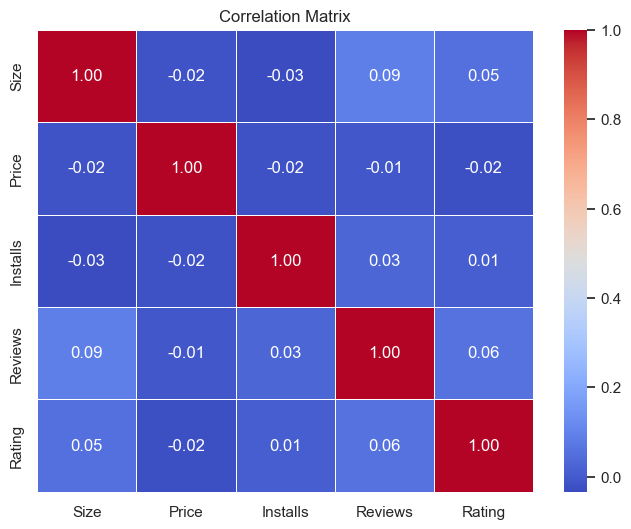

In [105]:
# Now you can proceed with correlation
correlation_matrix = df[['Size', 'Price', 'Installs', 'Reviews', 'Rating']].corr()
print(correlation_matrix)

# Optionally, visualize the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

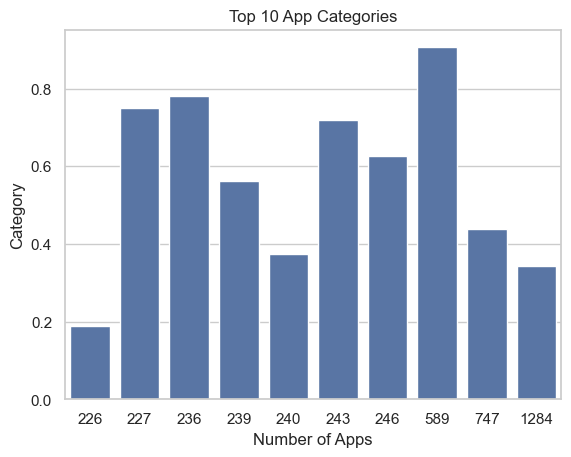

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


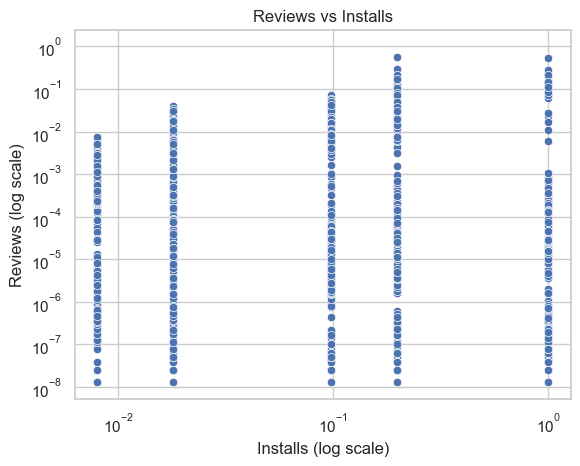

In [107]:
sns.scatterplot(data=df, x='Installs', y='Reviews')
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews vs Installs')
plt.xlabel('Installs (log scale)')
plt.ylabel('Reviews (log scale)')
plt.show()


In [108]:
df.describe()

,Category,Reviews,Size,Installs,Price,Content_Rating,Rating,Recency
count,6696.00000,6696.00000,6696.00000,6696.00000,6696.00000,6696.00000,6696.00000,6696.00000
mean,0.52805,0.00364,0.21849,0.14125,0.00230,0.29373,0.79253,0.09029
std,0.25951,0.02766,0.20782,0.27873,0.03863,0.20250,0.13429,0.13619
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.34375,0.00000,0.05859,0.00000,0.00000,0.20000,0.75000,0.00666
50%,0.43750,0.00004,0.20202,0.01804,0.00000,0.20000,0.82500,0.02599
75%,0.78125,0.00062,0.26263,0.19840,0.00000,0.20000,0.87500,0.11496
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [109]:
for col in df.columns:
    print(col,df[col].unique(),"\n")

Category [0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.375   0.40625 0.46875 0.5     0.53125 0.5625  0.4375
 0.34375 0.625   0.84375 0.8125  0.75    0.875   0.9375  0.90625 0.71875
 0.78125 0.6875  1.      0.96875 0.65625 0.59375] 

Reviews [1.23595311e-05 1.11963789e-03 2.12389458e-06 ... 1.13212537e-03
 7.70231647e-06 5.09614429e-03] 

Size [0.13131313 0.07777778 0.01818182 0.04646465 0.18181818 0.28282828
 0.02121212 0.27272727 0.11111111 0.2020202  0.01717172 0.04545455
 0.38383838 0.03232323 0.05050505 0.24242424 0.05151515 0.03636364
 0.08282828 0.1010101  0.23232323 0.2184878  0.08484848 0.09090909
 0.0020202  0.25252525 0.55555556 0.34343434 0.32323232 0.53535354
 0.04747475 0.16161616 0.07676768 0.01414141 0.26262626 0.06060606
 0.15151515 0.02424242 0.07979798 0.01919192 0.37373737 0.31313131
 0.04444444 0.17171717 0.0010101  0.06969697 0.51515152 0.08080808
 0.05757576 0.01616162 0.56565657 0.21212121 0.05454545 0.02222222
 0.072727

In [110]:
df.isnull().sum()

Category          0
Reviews           0
Size              0
Installs          0
Price             0
Content_Rating    0
Rating            0
Recency           0
dtype: int64

In [111]:
y=df["Rating"]
df.drop(columns="Rating",inplace=True)


In [112]:
x = df.to_numpy()
x

array([[0.00000000e+00, 1.23595311e-05, 1.31313131e-01, ...,
        0.00000000e+00, 2.00000000e-01, 6.83105631e-02],
       [0.00000000e+00, 1.11963789e-03, 7.77777778e-02, ...,
        0.00000000e+00, 2.00000000e-01, 2.33255581e-03],
       [0.00000000e+00, 1.23595311e-05, 1.81818182e-02, ...,
        0.00000000e+00, 2.00000000e-01, 1.63278907e-02],
       ...,
       [3.43750000e-01, 4.73398188e-07, 5.25252525e-01, ...,
        0.00000000e+00, 2.00000000e-01, 1.26291236e-01],
       [3.43750000e-01, 3.83836369e-08, 2.62626263e-02, ...,
        0.00000000e+00, 2.00000000e-01, 1.09963346e-02],
       [5.62500000e-01, 5.09614429e-03, 1.81818182e-01, ...,
        0.00000000e+00, 2.00000000e-01, 4.66511163e-03]])

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Train and evaluate Linear Regression
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)


# Train and evaluate Random Forest
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

# Train and evaluate XGBoost
xgb.fit(x_train_scaled, y_train)
y_pred_xgb = xgb.predict(x_train_scaled)
y_pred_test_xgb = xgb.predict(X_test_scaled)




# Initialize SVR
svr = SVR()

# Train SVR
svr.fit(x_train_scaled, y_train)
y_pred_svr = svr.predict(x_train_scaled)
y_pred_test_svr = svr.predict(X_test_scaled)

print("Linear Regression MAE for training:", mean_absolute_error(y_train, y_pred_lr))
print("Linear Regression MSE for training:", mean_squared_error(y_train, y_pred_lr))

print("Linear Regression MAE for testing:", mean_absolute_error(y_test, y_pred_test_lr))
print("Linear Regression MSE for testing:", mean_squared_error(y_test, y_pred_test_lr))

# Random Forest
print("Random Forest MAE for training:", mean_absolute_error(y_train, y_pred_rf))
print("Random Forest MSE for training:", mean_squared_error(y_train, y_pred_rf))

print("Random Forest MAE for testing:", mean_absolute_error(y_test, y_pred_test_rf))
print("Random Forest MSE for testing:", mean_squared_error(y_test, y_pred_test_rf))

# XGBoost
print("XGBoost MAE for training:", mean_absolute_error(y_train, y_pred_xgb))
print("XGBoost MSE for training:", mean_squared_error(y_train, y_pred_xgb))

print("XGBoost MAE for testing:", mean_absolute_error(y_test, y_pred_test_xgb))
print("XGBoost MSE for testing:", mean_squared_error(y_test, y_pred_test_xgb))

# SVR (already correct)
print("SVR MAE for training:", mean_absolute_error(y_train, y_pred_svr))
print("SVR MSE for training:", mean_squared_error(y_train, y_pred_svr))

print("SVR MAE for testing:", mean_absolute_error(y_test, y_pred_test_svr))
print("SVR MSE for testing:", mean_squared_error(y_test, y_pred_test_svr))



Linear Regression MAE for training: 0.0930275124615674
Linear Regression MSE for training: 0.01741309903632883
Linear Regression MAE for testing: 0.09536425464741888
Linear Regression MSE for testing: 0.018542844918478203
Random Forest MAE for training: 0.03231363424197161
Random Forest MSE for training: 0.002238668765111557
Random Forest MAE for testing: 0.08828305970149256
Random Forest MSE for testing: 0.017172708152985078
XGBoost MAE for training: 0.043539848560196104
XGBoost MSE for training: 0.003771744977730394
XGBoost MAE for testing: 0.09006705571911228
XGBoost MSE for testing: 0.01817133529157101
SVR MAE for training: 0.09040128246857221
SVR MSE for training: 0.016779981659225347
SVR MAE for testing: 0.09504090493506269
SVR MSE for testing: 0.018905431693047287


### 📊 Model Evaluation Summary

-**Linear Regression**
  - MAE (test): `0.0953`
  - MSE (test): `0.0185`
  

- **Random Forest**
  - MAE (test): `0.0883`
  - MSE (test): `0.0172`
  
- **XGBoost**
  - MAE (test): `0.0900`
  - MSE (test): `0.0181`
  -

- **SVR**
  - MAE (test): `0.0950`
  - MSE (test): `0.0189`
  

---

### Conclusion:
**Random Forest** achieved the lowest test errors, making it the best-performing model for this problem.
